Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [14]:
# Change column names: replace spaces with underscores
df.columns=(df.columns.to_series().replace('\s','_',regex=True)).to_list()
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [ ]:
# Get Pandas Profiling Report
# cant im working local and pp hates local enviroments google has the secret pandas_profilling sauce apperently

In [25]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)
sub=df[df.NEIGHBORHOOD.str.contains('tribeca'.upper())]
sub.shape[0]

146

In [27]:
# Q. What's the date range of these property sales in Tribeca?
sub.SALE_DATE=pd.to_datetime(sub.SALE_DATE,infer_datetime_format=True)
sub.SALE_DATE.describe()

count                     146
unique                     66
top       2019-02-12 00:00:00
freq                       17
first     2019-01-03 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [35]:
# The Pandas Profiling Report ( :( ) showed that SALE_PRICE was read as strings
# Convert it to integers
# my fancy one liner to remove all '$' leading and trailing space replace ',' with '' and remove '-' signs
sub.SALE_PRICE=sub.SALE_PRICE.apply(lambda x: int(x.strip('$').strip().replace(',','').strip('-')))


In [36]:
# Q. What is the maximum SALE_PRICE in this dataset?
sub.SALE_PRICE.max()

260000000

In [37]:
# Look at the row with the max SALE_PRICE
sub[sub.SALE_PRICE==sub.SALE_PRICE.max()]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
6499,1,TRIBECA,08 RENTALS - ELEVATOR APARTMENTS,2,224,1,NaN,D8,34 DESBROSSES STREET,NaN,...,283.0,3.0,286.0,"36,858",305542.0,2007.0,2,D8,260000000,2019-02-01


In [38]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?
sub.TOTAL_UNITS.value_counts()


1.0      131
0.0       11
5.0        1
286.0      1
8.0        1
3.0        1
Name: TOTAL_UNITS, dtype: int64

In [39]:
# Keep only the single units
sub=sub[sub.TOTAL_UNITS==1]

In [40]:
# Q. Now what is the max sales price? How many square feet does it have?
sub.SALE_PRICE.max()

39285000

In [45]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 
sub[sub.SALE_PRICE==0].SALE_PRICE.value_counts()
# or
print("properties that did not have cash consiterations or were transfered to family: ",sub[sub.SALE_PRICE==0].shape[0],sep='')
# remove theese $0 transfers because they are not going to be valuble to the predictions, infact they are going to effect the accuracy
sub = sub[sub.SALE_PRICE!=0]


properties that did not have cash consiterations or were transfered to family: 15


In [51]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?
sub[sub.GROSS_SQUARE_FEET>5000].GROSS_SQUARE_FEET.max()


39567.0

In [52]:
# What are the building class categories?
# How frequently does each occur?
sub.BUILDING_CLASS_AT_PRESENT.value_counts(normalize=True)

R4    0.913793
R1    0.077586
RK    0.008621
Name: BUILDING_CLASS_AT_PRESENT, dtype: float64

In [62]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments
subset=sub[sub['BUILDING_CLASS_CATEGORY'].str.contains('CONDOS - ELEVATOR APARTMENTS')]
subset.shape[0]
# Check how many rows you have now. (Should be 106 rows.)


106

In [66]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE
import plotly.express as px
px.scatter(x=subset.GROSS_SQUARE_FEET,y=subset.SALE_PRICE)

In [65]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"
px.scatter(x=subset.GROSS_SQUARE_FEET,y=subset.SALE_PRICE,trendline='ols')

70 VESTRY STREET, 7C     1
70 VESTRY STREET, 6F     1
70 VESTRY STREET, 7F     1
70 VESTRY STREET, 9W     1
70 VESTRY STREET, 6D     1
70 VESTRY STREET, 3C     1
70 VESTRY STREET, 6C     1
70 VESTRY STREET, 10W    1
70 VESTRY STREET, 7D     1
70 VESTRY STREET, 12S    1
70 VESTRY STREET, 7E     1
70 VESTRY STREET, 8W     1
70 VESTRY STREET, 6E     1
70 VESTRY STREET, 7A     1
70 VESTRY STREET, 11W    1
70 VESTRY STREET, 7B     1
Name: ADDRESS, dtype: int64

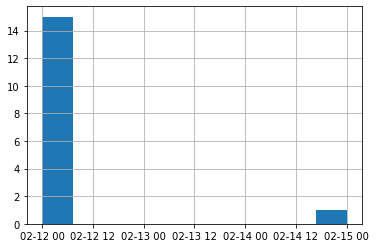

In [70]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?
s=subset[subset.SALE_PRICE>35000000]
s.SALE_DATE.hist()
s.ADDRESS.value_counts()

In [71]:
# Make a judgment call:
# Keep rows where sale price was < $35 million
subset=subset[subset.SALE_PRICE<35000000]
subset.shape[0]
# Check how many rows you have now. (Should be down to 90 rows.)


90

In [72]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline
px.scatter(x=subset.GROSS_SQUARE_FEET,y=subset.SALE_PRICE,trendline='ols')

In [75]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
try:
    subset.to_csv('../data/tribeca.csv')
except Exception as e:
    print(e)
    print("( > x < )")
    